### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [345]:
data = pd.read_csv('data/coupons.csv')

In [347]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [350]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [353]:
# Remove the 'car' column 
if 'car' in data.columns:
    data = data.drop('car', axis=1)

# Remove rows with any blank values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [356]:
accepted_coupons = data[data['Y'] == 1].shape[0]
total_observations = data.shape[0]
proportion_accepted = accepted_coupons / total_observations
print(f"The proportion of observations that accepted the coupon is: {proportion_accepted}")

The proportion of observations that accepted the coupon is: 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

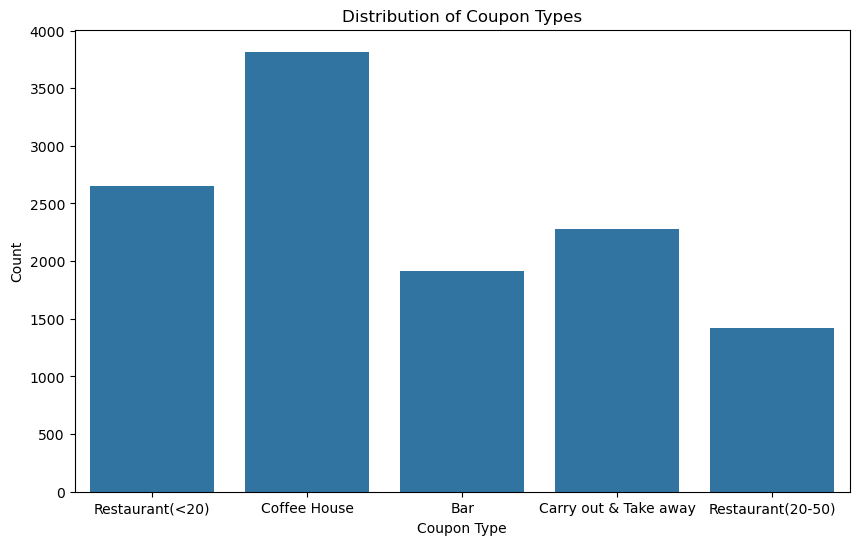

In [359]:
# Bar Plot to visualize the coupon column
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

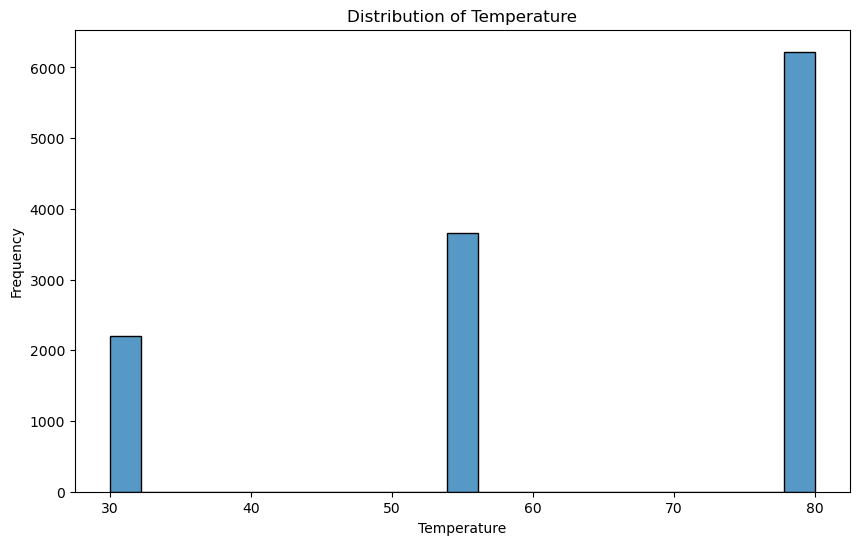

In [362]:
#Histogram to Visualize the tempreture column
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature']) 
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

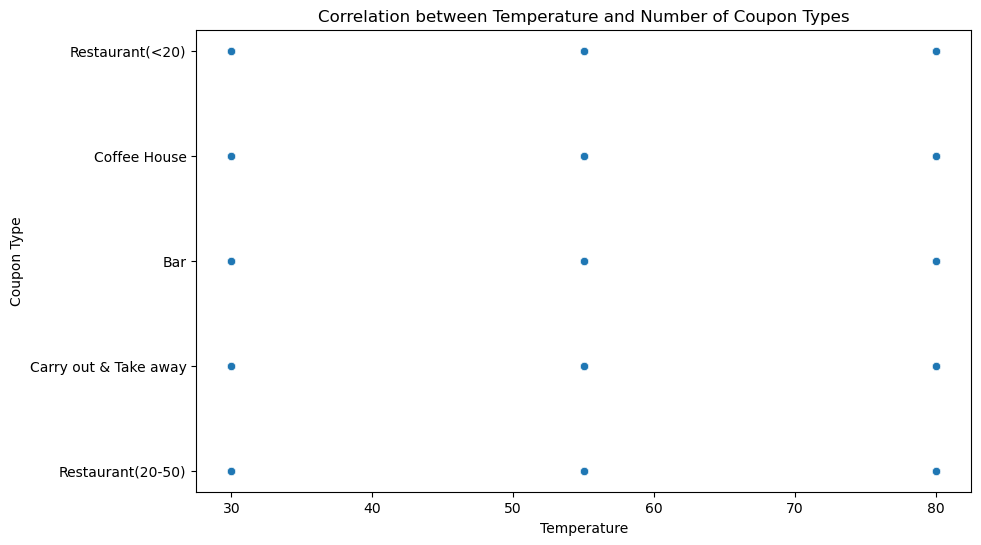

In [364]:
#A plot that shows the correlation between temprature and number of coupon types

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='coupon', data=data)
plt.title('Correlation between Temperature and Number of Coupon Types')
plt.xlabel('Temperature')
plt.ylabel('Coupon Type')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [367]:
#Create a new dataframe that contains only the bar column
data_bar=data[data["coupon"]=="Bar"]
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [370]:
# Calculate what proportion of bar copons were accepted!
accepted_bar_coupons = data_bar[data_bar['Y'] == 1].shape[0]
total_observations_bar = data_bar.shape[0]
proportion_accepted_bar = accepted_bar_coupons / total_observations_bar
print(f"The proportion of observations that accepted the coupon for bar offers is: {proportion_accepted_bar}")

The proportion of observations that accepted the coupon for bar offers is: 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


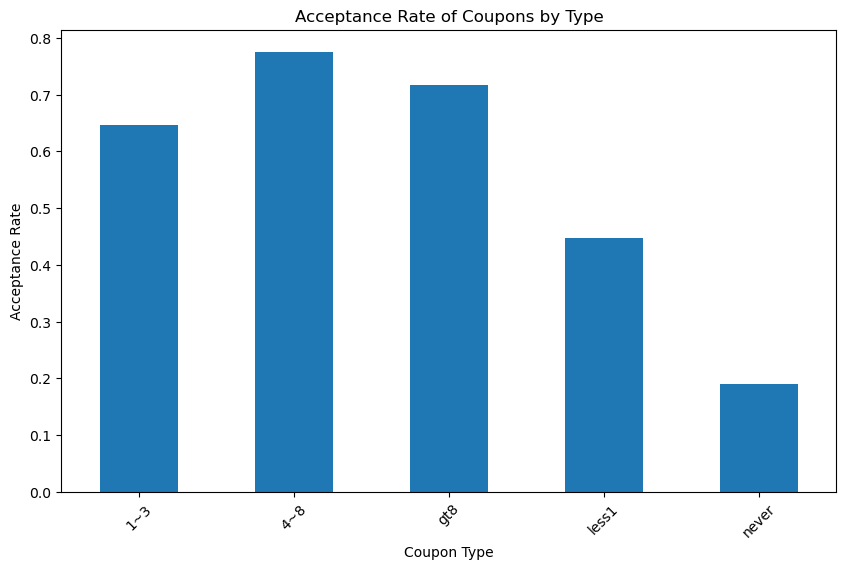

In [373]:
# Calculate the acceptance rate for each coupon type
coupon_acceptance = data_bar.groupby('Bar')['Y'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
coupon_acceptance.plot(kind='bar')
plt.title('Acceptance Rate of Coupons by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


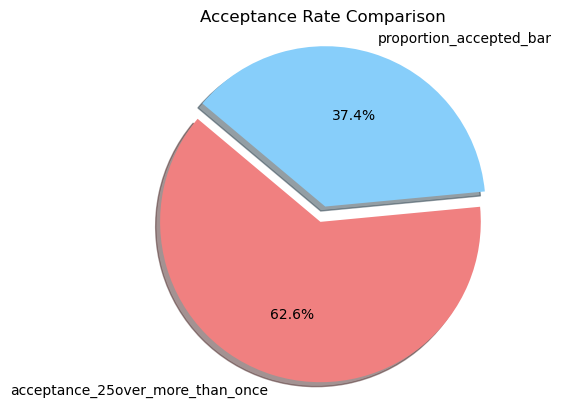

In [378]:
acceptance_25over_more_than_once = data_bar.query('Bar in ["1~3", "gt8", "4~8"] and age in ["26","31","36","41","46","50plus"]')['Y'].mean()


# Data for the pie chart
labels = ['acceptance_25over_more_than_once', 'proportion_accepted_bar']
sizes = [acceptance_25over_more_than_once, proportion_accepted_bar]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Acceptance Rate Comparison')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


0.7094339622641509
0.38095238095238093


Text(0, 0.5, 'Combination (Passanger/Bar)')

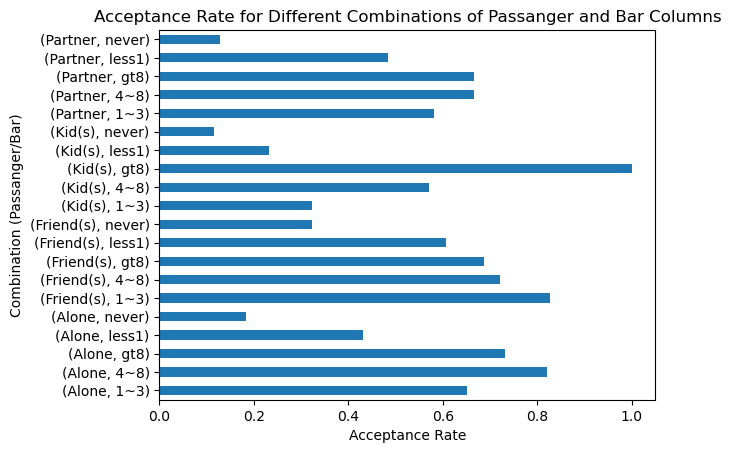

In [391]:
#Calculate two different scenarios with and without kids
data_bar_and_passenger_occupation_kid = data_bar.query('Bar in ["1~3", "gt8", "4~8"] and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')['Y'].mean()
data_bar_and_passenger_occupation_nokid = data_bar.query('Bar in ["1~3", "gt8", "4~8"] and passanger == "Kid(s)" and occupation != "Farming Fishing & Forestry"')['Y'].mean()

print(data_bar_and_passenger_occupation_kid)
print(data_bar_and_passenger_occupation_nokid)

# Plot Acceptance Rate for different combination of two columns
coupon_acceptance_1 = data_bar.groupby(['passanger','Bar'])['Y'].mean().plot(kind='barh')

plt.title("Acceptance Rate for Different Combinations of Passanger and Bar Columns")
plt.xlabel("Acceptance Rate")
plt.ylabel("Combination (Passanger/Bar)")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



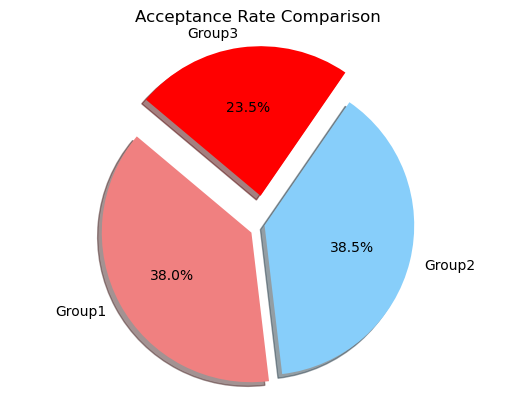

Text(0.5, 0.01, '                                              Group1  \\\n0  They go to bars more than once a month, had pa...   \n\n                                              Group2  \\\n0  They go to bars more than once a month and are...   \n\n                                              Group3  \n0  They go to cheap restaurants more than 4 times...  ')

<Figure size 640x480 with 0 Axes>

In [275]:
#calculate the acceptance rate for three different scenarios listed above
acceptance_morethanonce_nokids_no_widowed = data_bar.query('Bar in ["1~3", "gt8", "4~8"] and passanger != "Kid(s)" and maritalStatus != "Widowed"')['Y'].mean()
acceptance_morethanonce_under30  = data_bar.query('Bar in ["1~3", "gt8", "4~8"] and age in ["21","26","below21"]')['Y'].mean()
acceptance_morethan4_cheap  = data_bar.query('RestaurantLessThan20 not in ["1~3"] and income in ["$12500 - $24999","$37500 - $49999", "$25000 - $37499", "Less than $12500"]')['Y'].mean()

labels = ['Group1', 'Group2', 'Group3']
sizes = [acceptance_morethanonce_nokids_no_widowed, acceptance_morethanonce_under30, acceptance_morethan4_cheap]
colors = ['lightcoral', 'lightskyblue', 'red']
explode = (0.1, 0, 0.2)  # explode the 1st slice

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Acceptance Rate Comparison')
plt.show()

caption = {'Group1': ['They go to bars more than once a month, had passengers that were not a kid, and were not widowed'], 
           'Group2': ['They go to bars more than once a month and are under the age of 30'],
           'Group3': ['They go to cheap restaurants more than 4 times a month and income is less than 50K']}

#create a dataframe from the variable
df_caption = pd.DataFrame(caption)

#add description to the graph
plt.figtext(0.5, 0.01, df_caption, ha="left", fontsize=10)





7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Text(0, 0.5, 'Acceptance Rate')

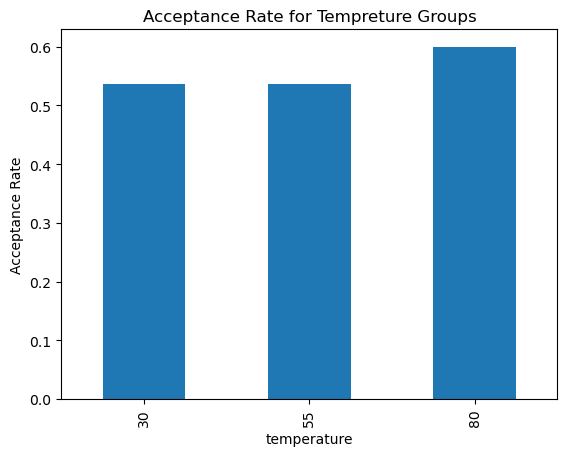

In [393]:
# The higher the temprerature the higher the chances of accepting the ticket
data.groupby('temperature')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Tempreture Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

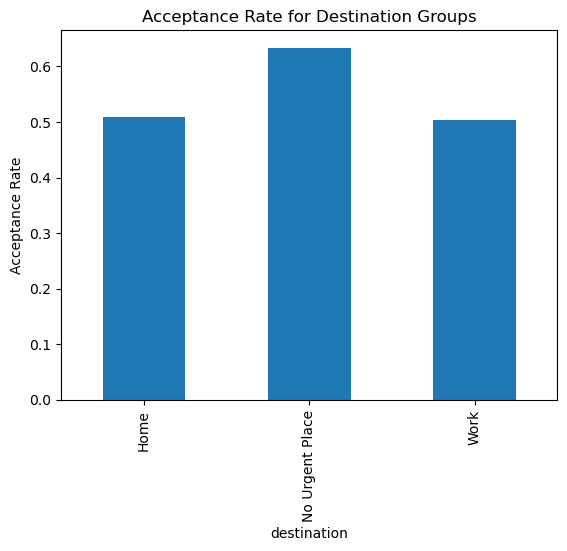

In [395]:
# If the person is not going to an urgent place, it is more likely to accept the coupon
data.groupby('destination')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Destination Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

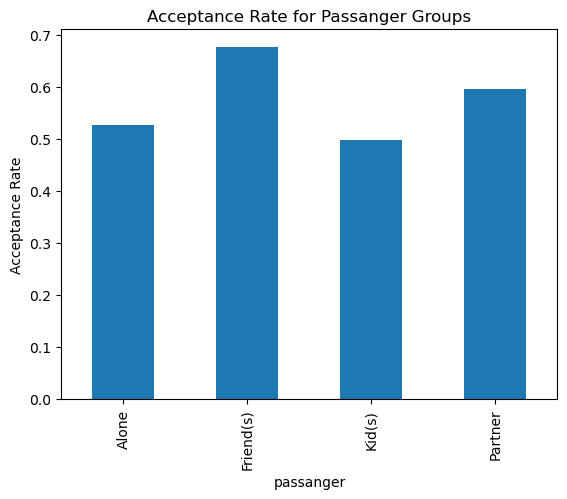

In [401]:
#If they are with friends, they are more likely to accept the ticket
data.groupby('passanger')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Passanger Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

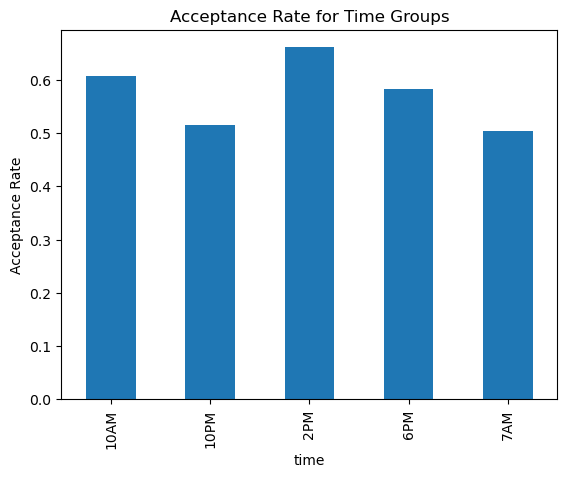

In [403]:
#Noon time is the best time to offer the coupon
data.groupby('time')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Time Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

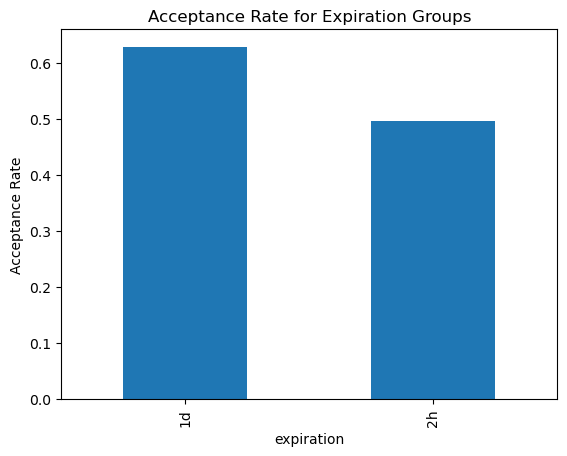

In [405]:
#They accept the cuopon if they have more time to use it
data.groupby('expiration')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Expiration Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

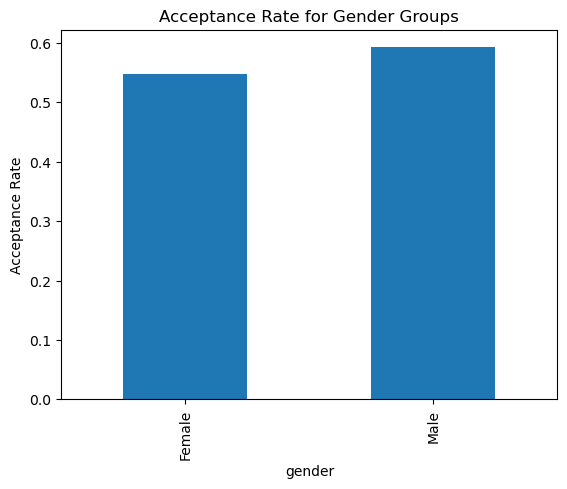

In [407]:
#Males are more likely to accept the offer
data.groupby('gender')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Gender Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

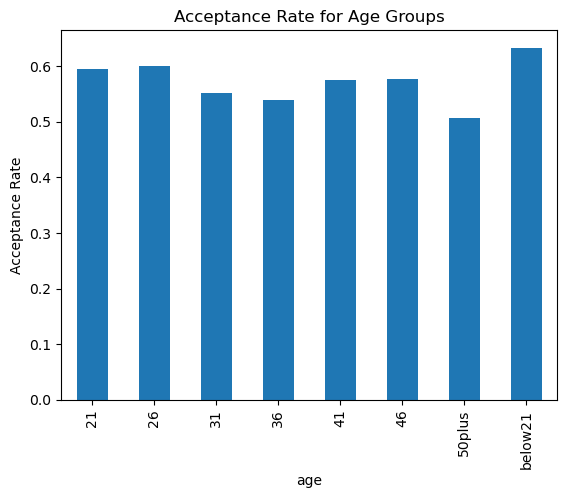

In [409]:
#Younger people are more interested in cuopons
data.groupby('age')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Age Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

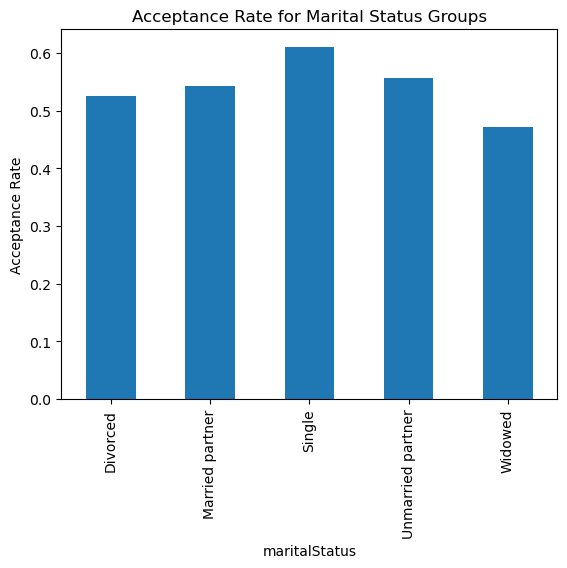

In [411]:
#Single people are more interested in cuopons
data.groupby('maritalStatus')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Marital Status Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

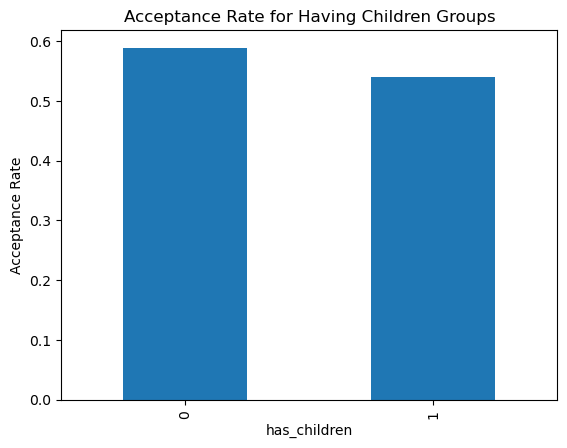

In [413]:
#If they do not have childeren they are more interested
data.groupby('has_children')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Having Children Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

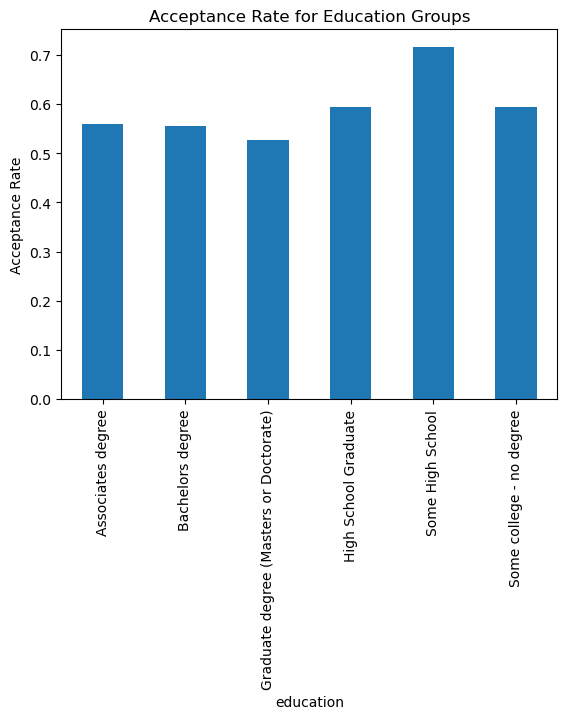

In [415]:
#Less graduated are more interested
data.groupby('education')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Education Groups")
plt.ylabel("Acceptance Rate")

Text(0, 0.5, 'Acceptance Rate')

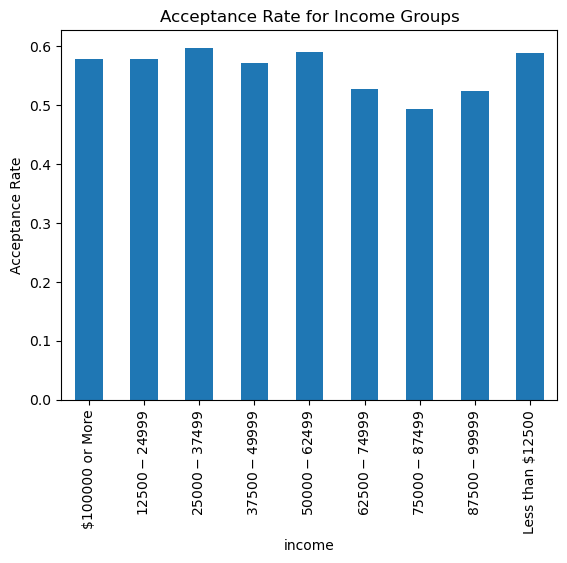

In [417]:
#Less income are more interested
data.groupby('income')["Y"].mean().plot(kind='bar')
plt.title("Acceptance Rate for Income Groups")
plt.ylabel("Acceptance Rate")